In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))

    inputs = []
    labels = []

    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414

        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)

    return np.array(inputs), np.array(labels).reshape(n, 1)

In [3]:
def generate_XOR_easy():
    inputs = []
    labels = []

    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)

        if 0.1*i == 0.5:
            continue

        inputs.append([0.1*i, 1 - 0.1*i])
        labels.append(1)

    return np.array(inputs), np.array(labels).reshape(21, 1)

In [4]:
def show_result(x, y, pred_y):
    plt.subplot(1, 2, 1)
    plt.title('Ground truth', fontsize=18)

    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')

    plt.subplot(1, 2, 2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')

    plt.show()

## Layer Modules

In [5]:
class Sigmoid:
    def __init__(self):
        self.inputs  = None
        self.outputs = None

    def ForwardPropagation(self, inputs):
        self.inputs  = inputs
        self.outputs = 1.0 / (1.0 + np.exp(-self.inputs))

        return self.outputs

    def BackPropagation(self, output_grad, learning_rate):
        grad = self.outputs * (1.0 - self.outputs)
        return output_grad * grad

In [6]:
class tanh:
    def __init__(self):
        self.inputs  = None
        self.outputs = None

    def ForwardPropagation(self, inputs):
        self.inputs  = inputs
        self.outputs = np.tanh(self.inputs)

        return self.outputs

    def BackPropagation(self, output_grad, learning_rate):
        grad = 1 / (np.cosh(self.inputs))**2
        return output_grad * grad

In [7]:
class ReLU:
    def __init__(self):
        self.inputs  = None
        self.outputs = None

    def ForwardPropagation(self, inputs):
        self.inputs  = inputs
        self.outputs = np.where(self.inputs < 0, 0, self.inputs)

        return self.outputs

    def BackPropagation(self, output_grad, learning_rate):
        grad = np.where(self.inputs < 0, 0, 1)
        return output_grad * grad

In [8]:
class LeakyReLU:
    def __init__(self):
        self.inputs  = None
        self.outputs = None

    def ForwardPropagation(self, inputs):
        self.inputs  = inputs
        self.outputs = np.where(self.inputs < 0, 0.01 * self.inputs, self.inputs)

        return self.outputs

    def BackPropagation(self, output_grad, learning_rate):
        grad = np.where(self.inputs < 0, 0.01, 1)
        return output_grad * grad

In [9]:
class FullConnectLayer:
    def __init__(self, input_size, output_size):
        self.inputs  = None
        self.outputs = None
        self.bias    = None
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias    = np.random.rand(output_size, 1) - 0.5

    def ForwardPropagation(self, inputs):
        self.inputs  =  inputs
        self.outputs =  np.matmul(self.inputs, self.weights)
        self.outputs += np.tile(self.bias.T, (self.inputs.shape[0], 1))

        return self.outputs

    def BackPropagation(self, output_grad, learning_rate):
        dinputs  = np.matmul(output_grad, self.weights.T)
        dweights = np.matmul(self.inputs.T, output_grad)
        dbias    = np.array([np.sum(output_grad, axis=0)]).T

        self.weights -= learning_rate * dweights
        self.bias    -= learning_rate * dbias

        return dinputs

## Build Model

In [10]:
class NeuralNetwork:
    def __init__(self):
        self.layers = []
        self.loss   = None
        self.errors = []

    def AddLayer(self, layer):
        self.layers.append(layer)

    def MSE(self, y, y_pred):
        self.loss = np.sum((y - y_pred)**2) / len(y)
        self.errors.append(self.loss)
        
        return self.loss

    def dMSE(self, y, y_pred):
        return -2 * (y - y_pred) / len(y)

    def ForwardPropagation(self, data):
        num = len(data)
        inputs = data

        for layer in self.layers:
            outputs = layer.ForwardPropagation(inputs)
            inputs  = outputs

        return outputs

    def predict(self, data):
        res = self.ForwardPropagation(data)
        pred = np.zeros(res.shape, dtype=int)
        pred = np.where(res > 0.5, 1, 0)

        return pred

    def fit(self, X, y, epochs=100000, learning_rate=0.05):
        num = len(X)

        for i in range(epochs):
            y_pred = self.ForwardPropagation(X)
            loss   = self.MSE(y, y_pred)

            if i % 5000 == 0:
                print("epoch", i, "loss :", self.loss)

            output_grad = self.dMSE(y, y_pred)
            for layer in reversed(self.layers):
                output_grad = layer.BackPropagation(output_grad, learning_rate)

## Train Model

In [11]:
x_train, y_train = generate_linear()

In [12]:
XOR_x, XOR_y = generate_XOR_easy()

epoch 0 loss : 0.258861794480321
epoch 5000 loss : 0.24502715336016853
epoch 10000 loss : 0.1404948846149724
epoch 15000 loss : 0.0455294005438637
epoch 20000 loss : 0.029042085050246334
epoch 25000 loss : 0.02215706072899572
epoch 30000 loss : 0.018315643094339206
epoch 35000 loss : 0.01585425744739156
epoch 40000 loss : 0.014131804767284378
epoch 45000 loss : 0.012849573623549788
epoch 50000 loss : 0.01185066513459158
epoch 55000 loss : 0.011045079157077848
epoch 60000 loss : 0.010377558720732887
epoch 65000 loss : 0.009812306989735816
epoch 70000 loss : 0.009325106441197006
epoch 75000 loss : 0.008898975281619578
epoch 80000 loss : 0.00852163928025955
epoch 85000 loss : 0.008183992676284405
epoch 90000 loss : 0.00787912544309881
epoch 95000 loss : 0.007601688609975316
Accuracy:100.00%


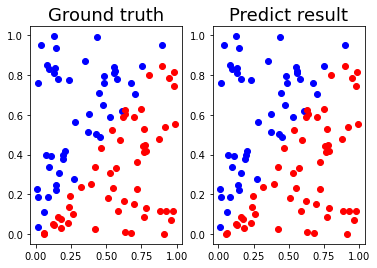

In [13]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(x_train, y_train)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

In [14]:
rand = random.sample(range(100), 20)
pred = simpleNet.ForwardPropagation(x_train[rand, :])
print(pred)
print(y_train[rand])

[[1.76715604e-06]
 [2.08425081e-05]
 [9.99999904e-01]
 [1.99393493e-04]
 [9.99945872e-01]
 [6.32002206e-02]
 [3.39364741e-01]
 [9.99999561e-01]
 [9.95682192e-01]
 [3.38917022e-05]
 [9.99999912e-01]
 [9.53967477e-01]
 [9.99992968e-01]
 [8.16133776e-03]
 [1.08316532e-07]
 [1.56014232e-02]
 [3.02067460e-03]
 [9.92257905e-01]
 [5.65887208e-08]
 [1.94429842e-04]]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


Text(0.5, 1.0, 'Learning Curve (activation: Sigmoid)')

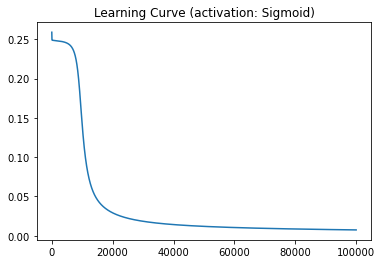

In [15]:
plt.plot(simpleNet.errors)
plt.title('Learning Curve (activation: Sigmoid)')

epoch 0 loss : 0.25076178429745777
epoch 5000 loss : 0.2493753402929019
epoch 10000 loss : 0.24511256417816454
epoch 15000 loss : 0.021372840945388827
epoch 20000 loss : 0.002032970135596018
epoch 25000 loss : 0.0006173109220795447
epoch 30000 loss : 0.00031935598055071534
epoch 35000 loss : 0.0002049585554785636
epoch 40000 loss : 0.00014717046112036825
epoch 45000 loss : 0.00011311910308661921
epoch 50000 loss : 9.098632447219251e-05
epoch 55000 loss : 7.559076738151684e-05
epoch 60000 loss : 6.433666768846717e-05
epoch 65000 loss : 5.5792519105017574e-05
epoch 70000 loss : 4.910948169645377e-05
epoch 75000 loss : 4.3754815315231014e-05
epoch 80000 loss : 3.937854507071138e-05
epoch 85000 loss : 3.574196736908904e-05
epoch 90000 loss : 3.267707879005743e-05
epoch 95000 loss : 3.0062441214600338e-05
Accuracy:100.00%


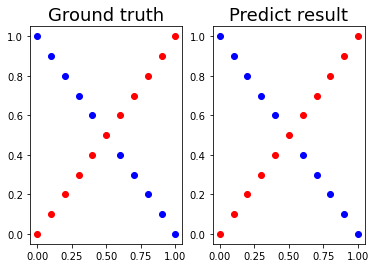

In [16]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(XOR_x, XOR_y, learning_rate=0.5)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

In [17]:
print(simpleNet.ForwardPropagation(XOR_x))
print(XOR_y)

[[1.58543244e-03]
 [9.99064376e-01]
 [4.03351507e-05]
 [9.99907746e-01]
 [1.22759587e-05]
 [9.99987637e-01]
 [5.41572193e-05]
 [9.99992465e-01]
 [2.51377548e-03]
 [9.88975928e-01]
 [1.66451582e-02]
 [2.38771235e-03]
 [9.86963486e-01]
 [9.06068614e-05]
 [9.99998487e-01]
 [5.70535703e-06]
 [9.99999945e-01]
 [8.22792807e-07]
 [9.99999984e-01]
 [2.23542305e-07]
 [9.99999991e-01]]
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]


Text(0.5, 1.0, 'Learning Curve XOR (activation: Sigmoid)')

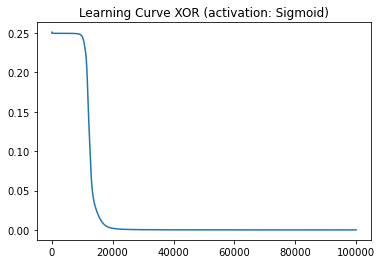

In [18]:
plt.plot(simpleNet.errors)
plt.title('Learning Curve XOR (activation: Sigmoid)')

In [19]:
# error lists of different learning rate
DiffLr = []

epoch 0 loss : 0.26135008599256676
epoch 5000 loss : 0.24805140664116812
epoch 10000 loss : 0.24712418320944254
epoch 15000 loss : 0.24583270463479004
epoch 20000 loss : 0.24363563096411867
epoch 25000 loss : 0.2392176059173578
epoch 30000 loss : 0.22889341000907543
epoch 35000 loss : 0.2030158847339062
epoch 40000 loss : 0.15474317490790976
epoch 45000 loss : 0.11005564242651361
epoch 50000 loss : 0.08226352944177913
epoch 55000 loss : 0.0654021835263579
epoch 60000 loss : 0.05456308716472069
epoch 65000 loss : 0.04712971657479351
epoch 70000 loss : 0.041728172435296244
epoch 75000 loss : 0.03761311823005608
epoch 80000 loss : 0.034360219769468556
epoch 85000 loss : 0.03171445841029529
epoch 90000 loss : 0.029514260499700698
epoch 95000 loss : 0.02765223235249686
Accuracy:99.00%


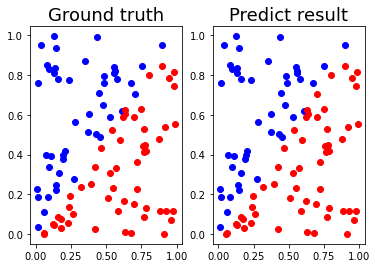

In [20]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(x_train, y_train, learning_rate=0.01)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffLr.append(simpleNet.errors)

epoch 0 loss : 0.2561282681574527
epoch 5000 loss : 0.21605921145259305
epoch 10000 loss : 0.05831574300555117
epoch 15000 loss : 0.032701632221732335
epoch 20000 loss : 0.023918262741447874
epoch 25000 loss : 0.01935139912422147
epoch 30000 loss : 0.01653683156214174
epoch 35000 loss : 0.014617177344747068
epoch 40000 loss : 0.013213969153970336
epoch 45000 loss : 0.012135503938654207
epoch 50000 loss : 0.01127473928308728
epoch 55000 loss : 0.010567307948140316
epoch 60000 loss : 0.009972193354217054
epoch 65000 loss : 0.00946201577817103
epoch 70000 loss : 0.009017788289945322
epoch 75000 loss : 0.008625915922140744
epoch 80000 loss : 0.008276394405599453
epoch 85000 loss : 0.007961685141868841
epoch 90000 loss : 0.0076759885370558285
epoch 95000 loss : 0.007414760850864929
Accuracy:100.00%


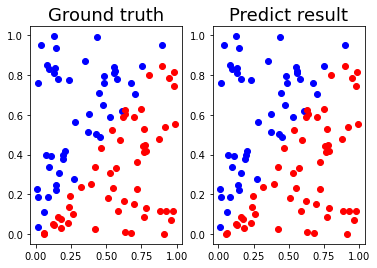

In [21]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(x_train, y_train, learning_rate=0.05)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffLr.append(simpleNet.errors)

epoch 0 loss : 0.24752990604623662
epoch 5000 loss : 0.06123880211851287
epoch 10000 loss : 0.024245809899368247
epoch 15000 loss : 0.01666099299682999
epoch 20000 loss : 0.013277810310398007
epoch 25000 loss : 0.011313502686321909
epoch 30000 loss : 0.009998713266075467
epoch 35000 loss : 0.009037825471669817
epoch 40000 loss : 0.008292859986048721
epoch 45000 loss : 0.007690449759295304
epoch 50000 loss : 0.007187708203437386
epoch 55000 loss : 0.006757699413629429
epoch 60000 loss : 0.006382544133537076
epoch 65000 loss : 0.006049859775617392
epoch 70000 loss : 0.00575079112205191
epoch 75000 loss : 0.005478855715354023
epoch 80000 loss : 0.005229230420749212
epoch 85000 loss : 0.004998287332224694
epoch 90000 loss : 0.004783275940220717
epoch 95000 loss : 0.004582095115253716
Accuracy:100.00%


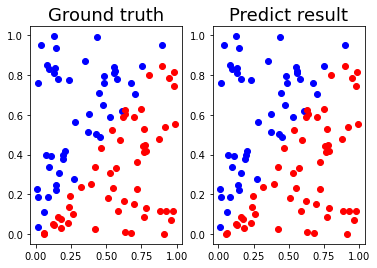

In [22]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(x_train, y_train, learning_rate=0.1)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffLr.append(simpleNet.errors)

epoch 0 loss : 0.25025162320219374
epoch 5000 loss : 0.011704877339866544
epoch 10000 loss : 0.007285742029853327
epoch 15000 loss : 0.005524695905922773
epoch 20000 loss : 0.004420859480611717
epoch 25000 loss : 0.0036141297026762303
epoch 30000 loss : 0.0029964689622465107
epoch 35000 loss : 0.0025145964247053894
epoch 40000 loss : 0.0021325517111861537
epoch 45000 loss : 0.001824815337185397
epoch 50000 loss : 0.0015734735804352584
epoch 55000 loss : 0.0013659260323988377
epoch 60000 loss : 0.0011931027166226418
epoch 65000 loss : 0.001048249461581672
epoch 70000 loss : 0.0009261701057327497
epoch 75000 loss : 0.0008227679589916598
epoch 80000 loss : 0.0007347618778451064
epoch 85000 loss : 0.0006594994995523206
epoch 90000 loss : 0.0005948252617571097
epoch 95000 loss : 0.0005389813979577259
Accuracy:100.00%


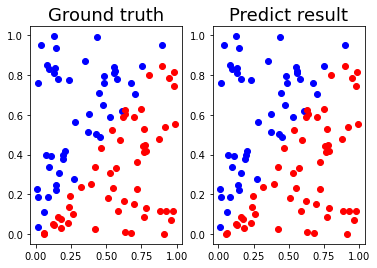

In [23]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(x_train, y_train, learning_rate=0.5)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffLr.append(simpleNet.errors)

Text(0.5, 1.0, 'Learning Curves with Different Learning Rate')

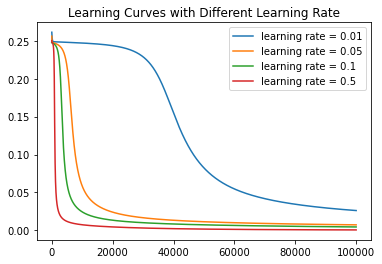

In [24]:
plt.plot(DiffLr[0], label='learning rate = 0.01')
plt.plot(DiffLr[1], label='learning rate = 0.05')
plt.plot(DiffLr[2], label='learning rate = 0.1')
plt.plot(DiffLr[3], label='learning rate = 0.5')

plt.legend()
plt.title('Learning Curves with Different Learning Rate')

## Different Learning Rate

In [25]:
# error lists of different learning rate
DiffLr = []

epoch 0 loss : 0.249505370447903
epoch 5000 loss : 0.24943744875156912
epoch 10000 loss : 0.2494368084347658
epoch 15000 loss : 0.24943616973238303
epoch 20000 loss : 0.24943553202953977
epoch 25000 loss : 0.24943489471467795
epoch 30000 loss : 0.24943425717801934
epoch 35000 loss : 0.24943361881003318
epoch 40000 loss : 0.24943297899990813
epoch 45000 loss : 0.2494323371340192
epoch 50000 loss : 0.2494316925943854
epoch 55000 loss : 0.24943104475710834
epoch 60000 loss : 0.24943039299078545
epoch 65000 loss : 0.2494297366548901
epoch 70000 loss : 0.2494290750981111
epoch 75000 loss : 0.24942840765664306
epoch 80000 loss : 0.24942773365241858
epoch 85000 loss : 0.24942705239127444
epoch 90000 loss : 0.24942636316104186
epoch 95000 loss : 0.24942566522955012
Accuracy:52.38%


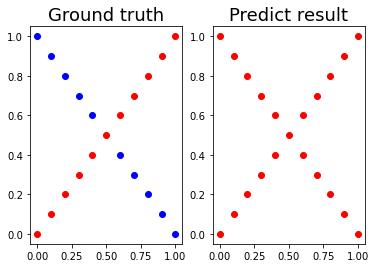

In [26]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(XOR_x, XOR_y, learning_rate=0.01)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffLr.append(simpleNet.errors)

epoch 0 loss : 0.2752116177495664
epoch 5000 loss : 0.24943750725778321
epoch 10000 loss : 0.24943340560998586
epoch 15000 loss : 0.24942944388594454
epoch 20000 loss : 0.24942551402396615
epoch 25000 loss : 0.2494215126065019
epoch 30000 loss : 0.24941733416486112
epoch 35000 loss : 0.24941286438101404
epoch 40000 loss : 0.24940797236164144
epoch 45000 loss : 0.24940250099782293
epoch 50000 loss : 0.2493962540576321
epoch 55000 loss : 0.2493889779837802
epoch 60000 loss : 0.24938033517513794
epoch 65000 loss : 0.24936986341454953
epoch 70000 loss : 0.2493569122713778
epoch 75000 loss : 0.24934054015004756
epoch 80000 loss : 0.24931934180761056
epoch 85000 loss : 0.24929114825245513
epoch 90000 loss : 0.24925248204024036
epoch 95000 loss : 0.2491975201230063
Accuracy:52.38%


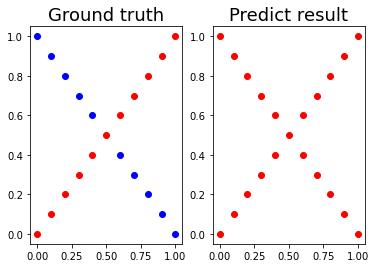

In [27]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(XOR_x, XOR_y, learning_rate=0.05)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffLr.append(simpleNet.errors)

epoch 0 loss : 0.27217098633414
epoch 5000 loss : 0.24943233358520991
epoch 10000 loss : 0.24942325384028385
epoch 15000 loss : 0.24941143128067764
epoch 20000 loss : 0.24939375632514152
epoch 25000 loss : 0.24936257365389874
epoch 30000 loss : 0.2492945189721685
epoch 35000 loss : 0.24909652075085714
epoch 40000 loss : 0.24826755126380387
epoch 45000 loss : 0.24317465159246446
epoch 50000 loss : 0.21320565356767213
epoch 55000 loss : 0.09873875860266763
epoch 60000 loss : 0.04239846421376864
epoch 65000 loss : 0.026372741930822913
epoch 70000 loss : 0.01739709686509487
epoch 75000 loss : 0.010900795442148958
epoch 80000 loss : 0.006612656427087233
epoch 85000 loss : 0.004121650974432785
epoch 90000 loss : 0.0027245594035498026
epoch 95000 loss : 0.0019151788999574402
Accuracy:100.00%


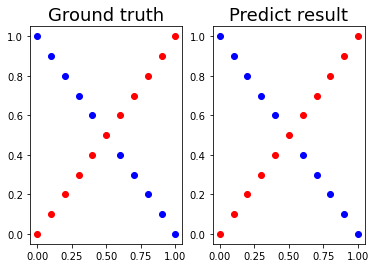

In [28]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(XOR_x, XOR_y, learning_rate=0.1)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffLr.append(simpleNet.errors)

epoch 0 loss : 0.29447375774750745
epoch 5000 loss : 0.24941512961655604
epoch 10000 loss : 0.24928153913113912
epoch 15000 loss : 0.14031401617140404
epoch 20000 loss : 0.04410283196517468
epoch 25000 loss : 0.043518052222870716
epoch 30000 loss : 0.043411539598584736
epoch 35000 loss : 0.04336867216480958
epoch 40000 loss : 0.04334290429672677
epoch 45000 loss : 0.043314429478522
epoch 50000 loss : 0.04316626967375431
epoch 55000 loss : 0.03375834815213129
epoch 60000 loss : 0.009412294257109313
epoch 65000 loss : 0.001551244214349527
epoch 70000 loss : 0.0006147347319269925
epoch 75000 loss : 0.00035127865199471295
epoch 80000 loss : 0.00023706815392223095
epoch 85000 loss : 0.00017548112849077985
epoch 90000 loss : 0.00013767714790868102
epoch 95000 loss : 0.00011240346634094214
Accuracy:100.00%


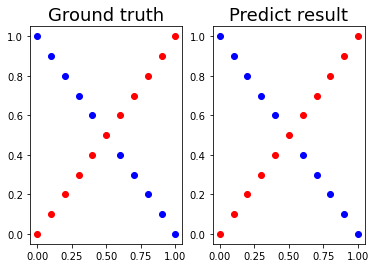

In [29]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(XOR_x, XOR_y, learning_rate=0.5)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffLr.append(simpleNet.errors)

Text(0.5, 1.0, 'Learning Curves with Different Learning Rate (XOR)')

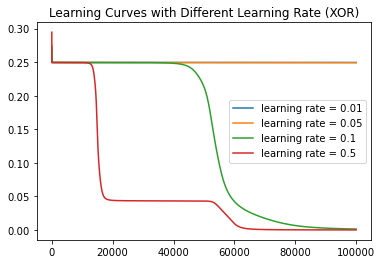

In [30]:
plt.plot(DiffLr[0], label='learning rate = 0.01')
plt.plot(DiffLr[1], label='learning rate = 0.05')
plt.plot(DiffLr[2], label='learning rate = 0.1')
plt.plot(DiffLr[3], label='learning rate = 0.5')

plt.legend()
plt.title('Learning Curves with Different Learning Rate (XOR)')

## Different Hidden Units

In [31]:
# error lists of different hidden units
DiffUnit = []

epoch 0 loss : 0.27233903800790266
epoch 5000 loss : 0.2473869187906477
epoch 10000 loss : 0.23403704908816766
epoch 15000 loss : 0.07703936273337177
epoch 20000 loss : 0.03682294237297635
epoch 25000 loss : 0.025737112924000837
epoch 30000 loss : 0.020400194463037175
epoch 35000 loss : 0.017227283829893556
epoch 40000 loss : 0.015109912352128208
epoch 45000 loss : 0.013585666610101237
epoch 50000 loss : 0.012427647222513136
epoch 55000 loss : 0.011511801790640694
epoch 60000 loss : 0.01076469551356989
epoch 65000 loss : 0.010140109487810767
epoch 70000 loss : 0.0096074989269607
epoch 75000 loss : 0.009145855427655922
epoch 80000 loss : 0.00874023916080397
epoch 85000 loss : 0.008379719944439565
epoch 90000 loss : 0.00805610321936568
epoch 95000 loss : 0.007763113542126779
Accuracy:99.00%


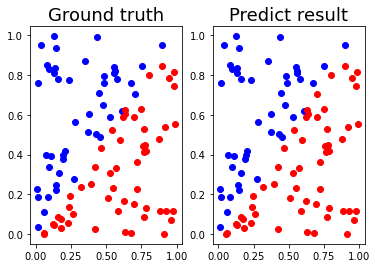

In [32]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 5))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(5, 5))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(5, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(x_train, y_train)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffUnit.append(simpleNet.errors)

epoch 0 loss : 0.30497770050952694
epoch 5000 loss : 0.24513539161757297
epoch 10000 loss : 0.15848736363840213
epoch 15000 loss : 0.04848426240781399
epoch 20000 loss : 0.03017106710016019
epoch 25000 loss : 0.022794360310889904
epoch 30000 loss : 0.01873714848703102
epoch 35000 loss : 0.016159494361603563
epoch 40000 loss : 0.014366540280859215
epoch 45000 loss : 0.013038065827103365
epoch 50000 loss : 0.012007098320874132
epoch 55000 loss : 0.01117835727571823
epoch 60000 loss : 0.010493570064186022
epoch 65000 loss : 0.009915101460444112
epoch 70000 loss : 0.009417556573384436
epoch 75000 loss : 0.008983170637238276
epoch 80000 loss : 0.008599133068516658
epoch 85000 loss : 0.008255961647779735
epoch 90000 loss : 0.007946476541447615
epoch 95000 loss : 0.007665131768981621
Accuracy:100.00%


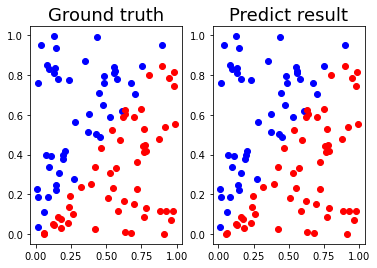

In [33]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(x_train, y_train)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffUnit.append(simpleNet.errors)

epoch 0 loss : 0.2854088855479254
epoch 5000 loss : 0.23748798733390816
epoch 10000 loss : 0.07766308648094106
epoch 15000 loss : 0.03680937274059995
epoch 20000 loss : 0.025734546102586894
epoch 25000 loss : 0.020380294911019014
epoch 30000 loss : 0.017199406425615734
epoch 35000 loss : 0.015081163183299185
epoch 40000 loss : 0.013558867083500015
epoch 45000 loss : 0.012403559550257575
epoch 50000 loss : 0.011490389883161325
epoch 55000 loss : 0.01074564490149342
epoch 60000 loss : 0.010123027732743728
epoch 65000 loss : 0.009591994200086428
epoch 70000 loss : 0.009131568436069784
epoch 75000 loss : 0.008726855534176403
epoch 80000 loss : 0.008366973315476735
epoch 85000 loss : 0.008043773456259166
epoch 90000 loss : 0.0077510224670636445
epoch 95000 loss : 0.007483861151094746
Accuracy:100.00%


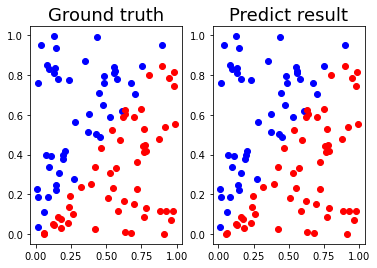

In [34]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 15))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(15, 15))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(15, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(x_train, y_train)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffUnit.append(simpleNet.errors)

epoch 0 loss : 0.2729029170880091
epoch 5000 loss : 0.17193798685418732
epoch 10000 loss : 0.04923233241776263
epoch 15000 loss : 0.030228041673327367
epoch 20000 loss : 0.022743662183966628
epoch 25000 loss : 0.018660736117860476
epoch 30000 loss : 0.0160787910698674
epoch 35000 loss : 0.014287988002460035
epoch 40000 loss : 0.012963419290632416
epoch 45000 loss : 0.011936540200080952
epoch 50000 loss : 0.011111562119965397
epoch 55000 loss : 0.010430086927901807
epoch 60000 loss : 0.009854489984032438
epoch 65000 loss : 0.009359429604361643
epoch 70000 loss : 0.008927201336686343
epoch 75000 loss : 0.008545049435997959
epoch 80000 loss : 0.008203537638369526
epoch 85000 loss : 0.007895523299552079
epoch 90000 loss : 0.007615490147721337
epoch 95000 loss : 0.007359101953803199
Accuracy:100.00%


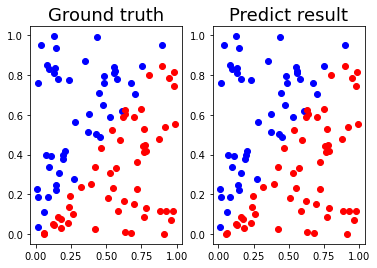

In [35]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 20))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(20, 20))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(20, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(x_train, y_train)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffUnit.append(simpleNet.errors)

Text(0.5, 1.0, 'Learning Curves with Different Hidden Units')

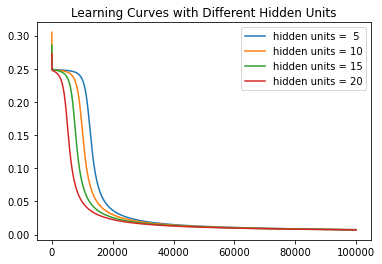

In [36]:
plt.plot(DiffUnit[0], label='hidden units =  5')
plt.plot(DiffUnit[1], label='hidden units = 10')
plt.plot(DiffUnit[2], label='hidden units = 15')
plt.plot(DiffUnit[3], label='hidden units = 20')

plt.legend()
plt.title('Learning Curves with Different Hidden Units')

In [37]:
# error lists of different hidden units
DiffUnit = []

epoch 0 loss : 0.26296217874065303
epoch 5000 loss : 0.249431572314338
epoch 10000 loss : 0.24943088444054418
epoch 15000 loss : 0.24943016734272377
epoch 20000 loss : 0.249429413418766
epoch 25000 loss : 0.24942861410301884
epoch 30000 loss : 0.24942775959888394
epoch 35000 loss : 0.24942683854675116
epoch 40000 loss : 0.24942583760515136
epoch 45000 loss : 0.24942474091493866
epoch 50000 loss : 0.24942352940467544
epoch 55000 loss : 0.24942217987844592
epoch 60000 loss : 0.24942066380226705
epoch 65000 loss : 0.24941894566771936
epoch 70000 loss : 0.24941698075416993
epoch 75000 loss : 0.24941471202212875
epoch 80000 loss : 0.24941206572965705
epoch 85000 loss : 0.24940894513630654
epoch 90000 loss : 0.24940522128231427
epoch 95000 loss : 0.2494007191900974
Accuracy:52.38%


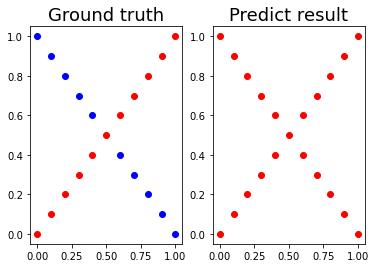

In [38]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 5))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(5, 5))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(5, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(XOR_x, XOR_y)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffUnit.append(simpleNet.errors)

epoch 0 loss : 0.27351378043498964
epoch 5000 loss : 0.24942989825333714
epoch 10000 loss : 0.24942807918639692
epoch 15000 loss : 0.24942623933282315
epoch 20000 loss : 0.24942434056793197
epoch 25000 loss : 0.2494223419427379
epoch 30000 loss : 0.24942019736229287
epoch 35000 loss : 0.24941785272712438
epoch 40000 loss : 0.2494152421858328
epoch 45000 loss : 0.24941228298157425
epoch 50000 loss : 0.2494088680907584
epoch 55000 loss : 0.2494048553606242
epoch 60000 loss : 0.24940005098465848
epoch 65000 loss : 0.24939418357829882
epoch 70000 loss : 0.24938686215070058
epoch 75000 loss : 0.24937750545505932
epoch 80000 loss : 0.24936521826892608
epoch 85000 loss : 0.24934856433617916
epoch 90000 loss : 0.2493251263054695
epoch 95000 loss : 0.24929059628545785
Accuracy:52.38%


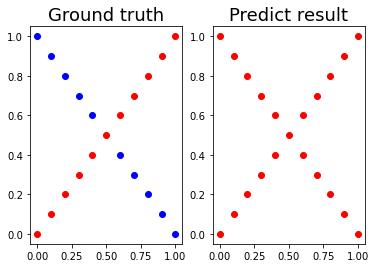

In [39]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(XOR_x, XOR_y)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffUnit.append(simpleNet.errors)

epoch 0 loss : 0.2954718633857095
epoch 5000 loss : 0.24939479911411724
epoch 10000 loss : 0.2493819251171758
epoch 15000 loss : 0.24936611512051413
epoch 20000 loss : 0.2493459777836219
epoch 25000 loss : 0.24931931441678362
epoch 30000 loss : 0.24928246143801822
epoch 35000 loss : 0.24922895037663353
epoch 40000 loss : 0.24914659123288185
epoch 45000 loss : 0.2490106462825709
epoch 50000 loss : 0.24876650317482954
epoch 55000 loss : 0.24828114664410203
epoch 60000 loss : 0.2471858009734469
epoch 65000 loss : 0.24422530659297662
epoch 70000 loss : 0.23387451730879633
epoch 75000 loss : 0.1920964503863472
epoch 80000 loss : 0.08740246306838825
epoch 85000 loss : 0.04968225144149216
epoch 90000 loss : 0.03437056524498437
epoch 95000 loss : 0.024721819930367345
Accuracy:100.00%


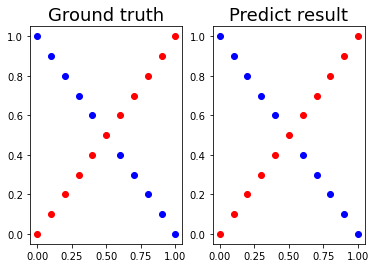

In [40]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 15))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(15, 15))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(15, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(XOR_x, XOR_y)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffUnit.append(simpleNet.errors)

epoch 0 loss : 0.24963665497278859
epoch 5000 loss : 0.2493862853017473
epoch 10000 loss : 0.24936433621392795
epoch 15000 loss : 0.24933800250368607
epoch 20000 loss : 0.249304934903775
epoch 25000 loss : 0.24926147411686395
epoch 30000 loss : 0.24920157001766416
epoch 35000 loss : 0.24911461872576549
epoch 40000 loss : 0.2489808721132545
epoch 45000 loss : 0.24876110421300157
epoch 50000 loss : 0.24837193790834436
epoch 55000 loss : 0.24762317790469662
epoch 60000 loss : 0.24604571394754235
epoch 65000 loss : 0.242370611060058
epoch 70000 loss : 0.23283258384191435
epoch 75000 loss : 0.20308388222834864
epoch 80000 loss : 0.12250655100761643
epoch 85000 loss : 0.06381021321150022
epoch 90000 loss : 0.04308467025745439
epoch 95000 loss : 0.032153613455954744
Accuracy:100.00%


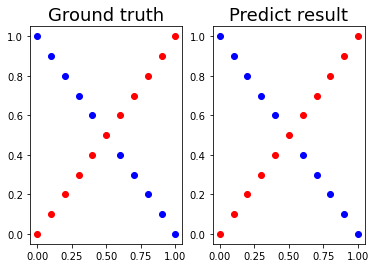

In [41]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 20))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(20, 20))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(20, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(XOR_x, XOR_y)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffUnit.append(simpleNet.errors)

Text(0.5, 1.0, 'Learning Curves with Different Hidden Units (XOR)')

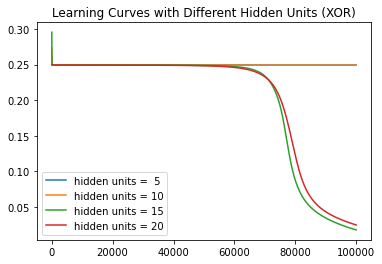

In [42]:
plt.plot(DiffUnit[0], label='hidden units =  5')
plt.plot(DiffUnit[1], label='hidden units = 10')
plt.plot(DiffUnit[2], label='hidden units = 15')
plt.plot(DiffUnit[3], label='hidden units = 20')

plt.legend()
plt.title('Learning Curves with Different Hidden Units (XOR)')

## With or w/o Sigmoid

In [63]:
# error lists of different activations
DiffAct = []

epoch 0 loss : 0.5367542344412221
epoch 5000 loss : 0.10609702750564018
epoch 10000 loss : 0.10609702750564018
epoch 15000 loss : 0.10609702750564018
epoch 20000 loss : 0.10609702750564018
epoch 25000 loss : 0.10609702750564018
epoch 30000 loss : 0.10609702750564018
epoch 35000 loss : 0.10609702750564018
epoch 40000 loss : 0.10609702750564018
epoch 45000 loss : 0.10609702750564018
epoch 50000 loss : 0.10609702750564018
epoch 55000 loss : 0.10609702750564018
epoch 60000 loss : 0.10609702750564018
epoch 65000 loss : 0.10609702750564018
epoch 70000 loss : 0.10609702750564018
epoch 75000 loss : 0.10609702750564018
epoch 80000 loss : 0.10609702750564018
epoch 85000 loss : 0.10609702750564018
epoch 90000 loss : 0.10609702750564018
epoch 95000 loss : 0.10609702750564018
Accuracy:97.00%


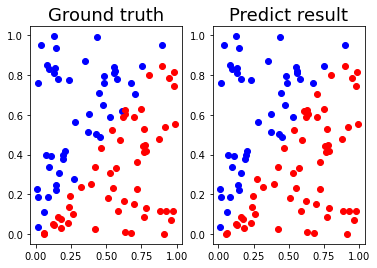

In [64]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(FullConnectLayer(10, 1))

simpleNet.fit(x_train, y_train)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffAct.append(simpleNet.errors)

epoch 0 loss : 0.24840335571934372
epoch 5000 loss : 0.22040087217839396
epoch 10000 loss : 0.06280631470196528
epoch 15000 loss : 0.03400100827025079
epoch 20000 loss : 0.024599851158507408
epoch 25000 loss : 0.01979400962848255
epoch 30000 loss : 0.016854627059982582
epoch 35000 loss : 0.014860582556450907
epoch 40000 loss : 0.013409484484829086
epoch 45000 loss : 0.012298465728159165
epoch 50000 loss : 0.01141464477444406
epoch 55000 loss : 0.010690359247222574
epoch 60000 loss : 0.010082617429299268
epoch 65000 loss : 0.009562793680010829
epoch 70000 loss : 0.009111080340601908
epoch 75000 loss : 0.008713321898898018
epoch 80000 loss : 0.008359119733093424
epoch 85000 loss : 0.008040651069945582
epoch 90000 loss : 0.007751907514714752
epoch 95000 loss : 0.007488189445605626
Accuracy:100.00%


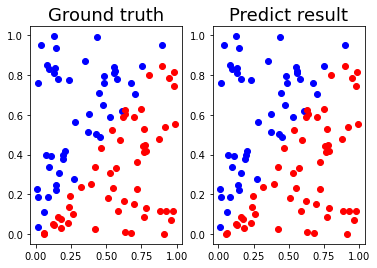

In [65]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(x_train, y_train)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffAct.append(simpleNet.errors)

Text(0.5, 1.0, 'Learning Curves of Using Sigmoid or not')

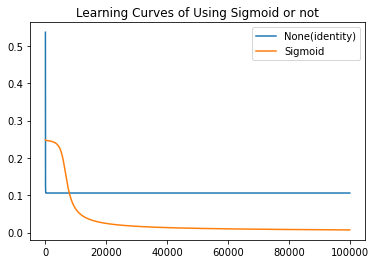

In [66]:
plt.plot(DiffAct[0], label='None(identity)')
plt.plot(DiffAct[1], label='Sigmoid')

plt.legend()
plt.title('Learning Curves of Using Sigmoid or not')

In [67]:
# error lists of different activations
DiffAct = []

epoch 0 loss : 0.78937231972024
epoch 5000 loss : 0.2494331065759637
epoch 10000 loss : 0.2494331065759637
epoch 15000 loss : 0.2494331065759637
epoch 20000 loss : 0.2494331065759637
epoch 25000 loss : 0.2494331065759637
epoch 30000 loss : 0.2494331065759637
epoch 35000 loss : 0.2494331065759637
epoch 40000 loss : 0.2494331065759637
epoch 45000 loss : 0.2494331065759637
epoch 50000 loss : 0.2494331065759637
epoch 55000 loss : 0.2494331065759637
epoch 60000 loss : 0.2494331065759637
epoch 65000 loss : 0.2494331065759637
epoch 70000 loss : 0.2494331065759637
epoch 75000 loss : 0.2494331065759637
epoch 80000 loss : 0.2494331065759637
epoch 85000 loss : 0.2494331065759637
epoch 90000 loss : 0.2494331065759637
epoch 95000 loss : 0.2494331065759637
Accuracy:52.38%


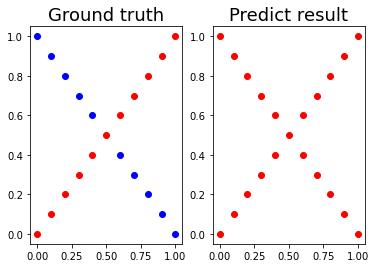

In [68]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(FullConnectLayer(10, 1))

simpleNet.fit(XOR_x, XOR_y, learning_rate=0.1)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffAct.append(simpleNet.errors)

epoch 0 loss : 0.28442536036614213
epoch 5000 loss : 0.24943378375563666
epoch 10000 loss : 0.24942400550293545
epoch 15000 loss : 0.2494128803735561
epoch 20000 loss : 0.2493984744116316
epoch 25000 loss : 0.24937727335369583
epoch 30000 loss : 0.24934151563682233
epoch 35000 loss : 0.24927032910077176
epoch 40000 loss : 0.24909083185248093
epoch 45000 loss : 0.24841740546127833
epoch 50000 loss : 0.24289582968417833
epoch 55000 loss : 0.1548331647534918
epoch 60000 loss : 0.0497118426475572
epoch 65000 loss : 0.01584935564807837
epoch 70000 loss : 0.0052220129067241765
epoch 75000 loss : 0.0025340600934318897
epoch 80000 loss : 0.001539978959461815
epoch 85000 loss : 0.0010619686145443752
epoch 90000 loss : 0.0007917822961802318
epoch 95000 loss : 0.000621972672867435
Accuracy:100.00%


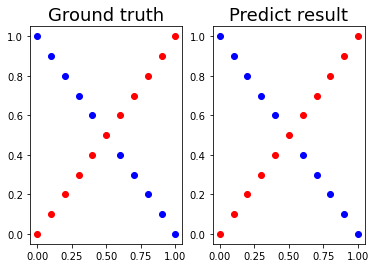

In [69]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(XOR_x, XOR_y, learning_rate=0.1)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffAct.append(simpleNet.errors)

Text(0.5, 1.0, 'Learning Curves of Using Sigmoid or not (XOR)')

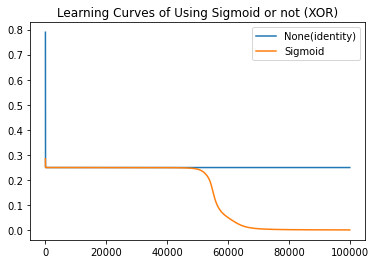

In [70]:
plt.plot(DiffAct[0], label='None(identity)')
plt.plot(DiffAct[1], label='Sigmoid')

plt.legend()
plt.title('Learning Curves of Using Sigmoid or not (XOR)')

## Different Activations

In [51]:
# error lists of different activations
DiffAct = []

epoch 0 loss : 0.252531851494087
epoch 5000 loss : 0.21590409032276883
epoch 10000 loss : 0.05876339115398837
epoch 15000 loss : 0.032815710972754035
epoch 20000 loss : 0.02397214152850508
epoch 25000 loss : 0.019380916285505798
epoch 30000 loss : 0.016553091203566423
epoch 35000 loss : 0.014625377653162139
epoch 40000 loss : 0.013217048849188928
epoch 45000 loss : 0.012135293433478746
epoch 50000 loss : 0.01127244509208799
epoch 55000 loss : 0.010563752480960436
epoch 60000 loss : 0.009967947191124786
epoch 65000 loss : 0.009457476907721455
epoch 70000 loss : 0.009013232747334064
epoch 75000 loss : 0.008621531798647799
epoch 80000 loss : 0.008272305552155069
epoch 85000 loss : 0.007957968143985613
epoch 90000 loss : 0.007672685113229657
epoch 95000 loss : 0.007411887039799272
Accuracy:100.00%


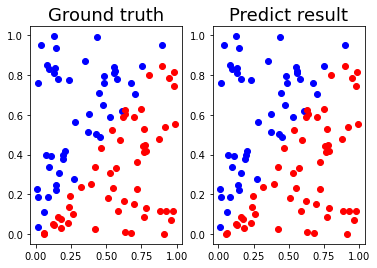

In [52]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(x_train, y_train)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffAct.append(simpleNet.errors)

epoch 0 loss : 0.2908908262906523
epoch 5000 loss : 0.017755991969374444
epoch 10000 loss : 0.012027547887943364
epoch 15000 loss : 0.009847064600310165
epoch 20000 loss : 0.008374217173443043
epoch 25000 loss : 0.007271871954807091
epoch 30000 loss : 0.0064352718118921605
epoch 35000 loss : 0.005817412642480858
epoch 40000 loss : 0.005343443121892917
epoch 45000 loss : 0.004948292195360472
epoch 50000 loss : 0.00460061559218378
epoch 55000 loss : 0.004287928516035966
epoch 60000 loss : 0.004004485553938394
epoch 65000 loss : 0.003746207154310211
epoch 70000 loss : 0.0035091186813771763
epoch 75000 loss : 0.0032890715871835736
epoch 80000 loss : 0.003081811780453915
epoch 85000 loss : 0.002883177506442696
epoch 90000 loss : 0.002689328584715814
epoch 95000 loss : 0.0024969639830799348
Accuracy:100.00%


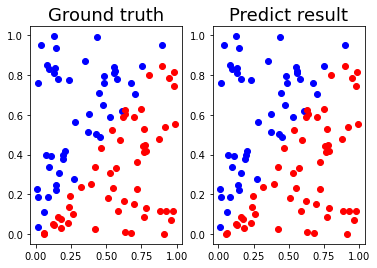

In [53]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(tanh())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(tanh())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(tanh())

simpleNet.fit(x_train, y_train)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffAct.append(simpleNet.errors)

epoch 0 loss : 0.40300054088977
epoch 5000 loss : 0.009313254565020088
epoch 10000 loss : 0.006429639240686138
epoch 15000 loss : 0.004592702289846766
epoch 20000 loss : 0.0031196491392338605
epoch 25000 loss : 0.003946846773250242
epoch 30000 loss : 0.0030680143993211968
epoch 35000 loss : 0.0021385778636515405
epoch 40000 loss : 0.001701864012198201
epoch 45000 loss : 0.0014197681641933751
epoch 50000 loss : 0.001182810460164547
epoch 55000 loss : 0.0009743709906160324
epoch 60000 loss : 0.0007918337243762981
epoch 65000 loss : 0.0006043470397741849
epoch 70000 loss : 0.0003989078669605025
epoch 75000 loss : 0.0001974487295411106
epoch 80000 loss : 5.664877526872138e-05
epoch 85000 loss : 7.762137613647561e-06
epoch 90000 loss : 6.199374650228475e-07
epoch 95000 loss : 3.989223871794471e-08
Accuracy:100.00%


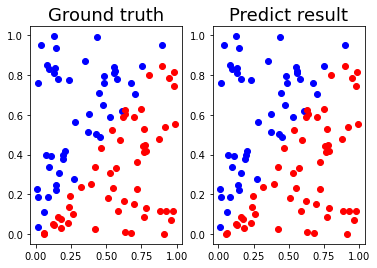

In [54]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(ReLU())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(ReLU())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(ReLU())

simpleNet.fit(x_train, y_train)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffAct.append(simpleNet.errors)

epoch 0 loss : 0.46126920593234316
epoch 5000 loss : 0.008467353650417614
epoch 10000 loss : 0.00612411825161465
epoch 15000 loss : 0.0045391130722636595
epoch 20000 loss : 0.003434503042611987
epoch 25000 loss : 0.0031068062340157184
epoch 30000 loss : 0.00335416784164532
epoch 35000 loss : 0.001774478356353991
epoch 40000 loss : 0.0020837275514292023
epoch 45000 loss : 0.0018141572063801975
epoch 50000 loss : 0.0015728915392254161
epoch 55000 loss : 0.0013640167199598216
epoch 60000 loss : 0.001133446941271951
epoch 65000 loss : 0.0009668124906636268
epoch 70000 loss : 0.0008016894034730418
epoch 75000 loss : 0.0006297373789376137
epoch 80000 loss : 0.00045308846945312235
epoch 85000 loss : 0.0002894562474334364
epoch 90000 loss : 0.00016639183126916586
epoch 95000 loss : 9.925501962904109e-05
Accuracy:100.00%


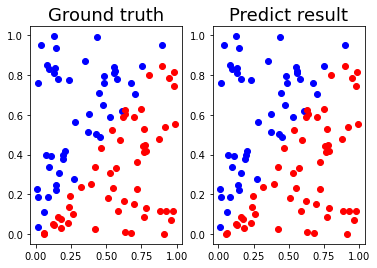

In [55]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(LeakyReLU())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(LeakyReLU())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(LeakyReLU())

simpleNet.fit(x_train, y_train)

y_pred = simpleNet.predict(x_train)
acc    = 1 - np.sum(np.abs(y_train - y_pred)) / len(y_train)

print('Accuracy:{:.2%}'.format(acc))
show_result(x_train, y_train, y_pred)

DiffAct.append(simpleNet.errors)

Text(0.5, 1.0, 'Learning Curves of Using Different Activation Functions')

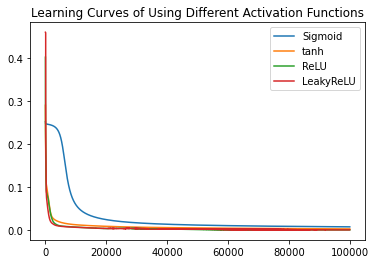

In [56]:
plt.plot(DiffAct[0], label='Sigmoid')
plt.plot(DiffAct[1], label='tanh')
plt.plot(DiffAct[2], label='ReLU')
plt.plot(DiffAct[3], label='LeakyReLU')

plt.legend()
plt.title('Learning Curves of Using Different Activation Functions')

In [72]:
# error lists of different activations
DiffAct = []

epoch 0 loss : 0.253078757173205
epoch 5000 loss : 0.249423173056678
epoch 10000 loss : 0.24941279602107122
epoch 15000 loss : 0.24940163238774427
epoch 20000 loss : 0.24938766090207226
epoch 25000 loss : 0.24936789172944382
epoch 30000 loss : 0.2493365844064724
epoch 35000 loss : 0.24928037980112272
epoch 40000 loss : 0.24916102166276263
epoch 45000 loss : 0.2488313880419531
epoch 50000 loss : 0.2473615786560281
epoch 55000 loss : 0.23213820912354857
epoch 60000 loss : 0.09513927050510353
epoch 65000 loss : 0.032938437767263386
epoch 70000 loss : 0.014078776282580793
epoch 75000 loss : 0.006420770471345179
epoch 80000 loss : 0.003468438093307428
epoch 85000 loss : 0.002165175110689359
epoch 90000 loss : 0.0014952159859005353
epoch 95000 loss : 0.0011072091066476092
Accuracy:100.00%


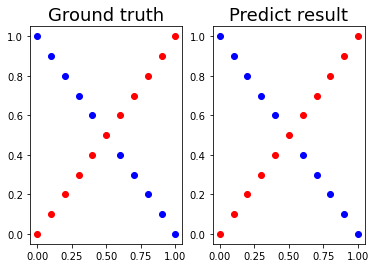

In [73]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(Sigmoid())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(Sigmoid())

simpleNet.fit(XOR_x, XOR_y, learning_rate=0.1)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffAct.append(simpleNet.errors)

epoch 0 loss : 0.2505990907110908
epoch 5000 loss : 0.0009276018949778223
epoch 10000 loss : 0.0001491064606918621
epoch 15000 loss : 8.095483658411139e-05
epoch 20000 loss : 9.382362376654301e-05
epoch 25000 loss : 7.189778624505714e-05
epoch 30000 loss : 5.750941753387223e-05
epoch 35000 loss : 4.7562433468159434e-05
epoch 40000 loss : 4.03492426540241e-05
epoch 45000 loss : 3.492095894220513e-05
epoch 50000 loss : 3.07104463583617e-05
epoch 55000 loss : 2.735978715293602e-05
epoch 60000 loss : 2.463418229951148e-05
epoch 65000 loss : 2.23749034135573e-05
epoch 70000 loss : 2.0471838215815586e-05
epoch 75000 loss : 1.8846759627563927e-05
epoch 80000 loss : 1.7442822956681357e-05
epoch 85000 loss : 1.6217824170814045e-05
epoch 90000 loss : 1.5139789908499242e-05
epoch 95000 loss : 1.4184041116656524e-05
Accuracy:100.00%


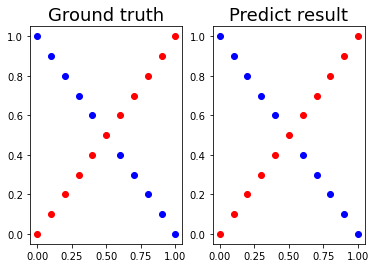

In [74]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(tanh())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(tanh())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(tanh())

simpleNet.fit(XOR_x, XOR_y, learning_rate=0.1)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffAct.append(simpleNet.errors)

epoch 0 loss : 0.4645068683556186
epoch 5000 loss : 3.7444165447701097e-07
epoch 10000 loss : 1.8922902068003093e-08
epoch 15000 loss : 1.1830717071096201e-09
epoch 20000 loss : 7.361450818093534e-11
epoch 25000 loss : 4.637280439337874e-12
epoch 30000 loss : 2.971540057054641e-13
epoch 35000 loss : 1.831457549796373e-14
epoch 40000 loss : 1.1680993424066343e-15
epoch 45000 loss : 7.466518215482735e-17
epoch 50000 loss : 4.604315331920186e-18
epoch 55000 loss : 2.971934782863498e-19
epoch 60000 loss : 1.8508855157567874e-20
epoch 65000 loss : 1.172676236524897e-21
epoch 70000 loss : 7.432673778178879e-23
epoch 75000 loss : 4.645794476753879e-24
epoch 80000 loss : 2.927462855959555e-25
epoch 85000 loss : 1.874544534032021e-26
epoch 90000 loss : 1.1958792359480327e-27
epoch 95000 loss : 7.718642983289453e-29
Accuracy:100.00%


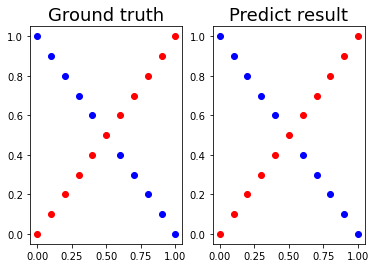

In [75]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(ReLU())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(ReLU())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(ReLU())

simpleNet.fit(XOR_x, XOR_y, learning_rate=0.1)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffAct.append(simpleNet.errors)

epoch 0 loss : 0.25772555129121455
epoch 5000 loss : 1.0160823830257606e-05
epoch 10000 loss : 9.413459644273522e-06
epoch 15000 loss : 8.600280961906253e-06
epoch 20000 loss : 7.87629177101315e-06
epoch 25000 loss : 7.188920394941119e-06
epoch 30000 loss : 6.4505824756912566e-06
epoch 35000 loss : 5.795838760529179e-06
epoch 40000 loss : 5.2117742710059955e-06
epoch 45000 loss : 4.691331840960211e-06
epoch 50000 loss : 4.226360803952728e-06
epoch 55000 loss : 3.810626383964217e-06
epoch 60000 loss : 3.4387806006115078e-06
epoch 65000 loss : 3.1058864672800176e-06
epoch 70000 loss : 2.8076587664656152e-06
epoch 75000 loss : 2.5405938550205987e-06
epoch 80000 loss : 2.3002587907811868e-06
epoch 85000 loss : 2.085063195241775e-06
epoch 90000 loss : 1.8914686527200602e-06
epoch 95000 loss : 1.717189661547808e-06
Accuracy:100.00%


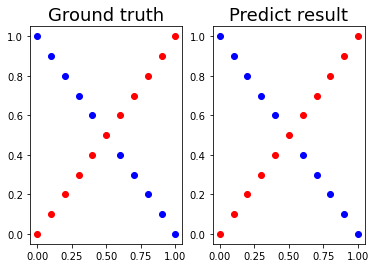

In [76]:
simpleNet = NeuralNetwork()

simpleNet.AddLayer(FullConnectLayer(2, 10))
simpleNet.AddLayer(LeakyReLU())
simpleNet.AddLayer(FullConnectLayer(10, 10))
simpleNet.AddLayer(LeakyReLU())
simpleNet.AddLayer(FullConnectLayer(10, 1))
simpleNet.AddLayer(LeakyReLU())

simpleNet.fit(XOR_x, XOR_y, learning_rate=0.1)

y_pred = simpleNet.predict(XOR_x)
acc    = 1 - np.sum(np.abs(XOR_y - y_pred)) / len(XOR_y)

print('Accuracy:{:.2%}'.format(acc))
show_result(XOR_x, XOR_y, y_pred)

DiffAct.append(simpleNet.errors)

Text(0.5, 1.0, 'Learning Curves of Using Different Activation Functions (XOR)')

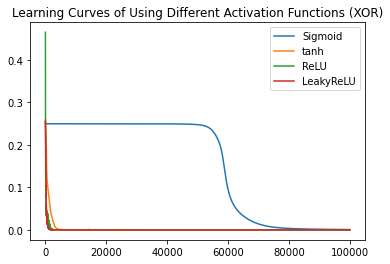

In [77]:
plt.plot(DiffAct[0], label='Sigmoid')
plt.plot(DiffAct[1], label='tanh')
plt.plot(DiffAct[2], label='ReLU')
plt.plot(DiffAct[3], label='LeakyReLU')

plt.legend()
plt.title('Learning Curves of Using Different Activation Functions (XOR)')